# **Metodo de Diferencias Finitas**

In [1380]:
import numpy as np
import matplotlib.pyplot as plt

## _EDOs de Primer Orden_


### Ejemplo: $y' = f$ donde $y_0 = 2$

In [1381]:
n = 50
h = 1/(n+1)
idx = np.linspace(0,n+1,n+2) # De 0 a n+1 hay n+2 valores
x_vals = idx*h
y0 = 2

$$
\frac{dy_i}{dx} \approx \frac{y_{i+1} - y_i}{h}
$$

In [1382]:
M = np.identity(n+1)

In [1383]:
for i in range(n):
    M[i+1][i] = -1

In [1384]:
M

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]], shape=(51, 51))

Definimos funcion como $f(x) = 2x +1$

In [1385]:
fx = 2*x_vals +1

In [1386]:
b = h*fx[0:n+1]

In [1387]:
b[0] = b[0]+y0

Resolucion

In [1388]:
y_vals = np.linalg.solve(M,b)

In [1389]:
y_vals = np.insert(y_vals,0,y0)

In [1390]:
y_vals

array([2.        , 2.01960784, 2.03998462, 2.06113033, 2.08304498,
       2.10572857, 2.12918108, 2.15340254, 2.17839293, 2.20415225,
       2.23068051, 2.2579777 , 2.28604383, 2.31487889, 2.34448289,
       2.37485582, 2.40599769, 2.4379085 , 2.47058824, 2.50403691,
       2.53825452, 2.57324106, 2.60899654, 2.64552095, 2.6828143 ,
       2.72087659, 2.7597078 , 2.79930796, 2.83967705, 2.88081507,
       2.92272203, 2.96539792, 3.00884275, 3.05305652, 3.09803922,
       3.14379085, 3.19031142, 3.23760092, 3.28565936, 3.33448674,
       3.38408304, 3.43444829, 3.48558247, 3.53748558, 3.59015763,
       3.64359862, 3.69780854, 3.75278739, 3.80853518, 3.8650519 ,
       3.92233756, 3.98039216])

In [1391]:
y_true = (x_vals)**2 + x_vals + 2

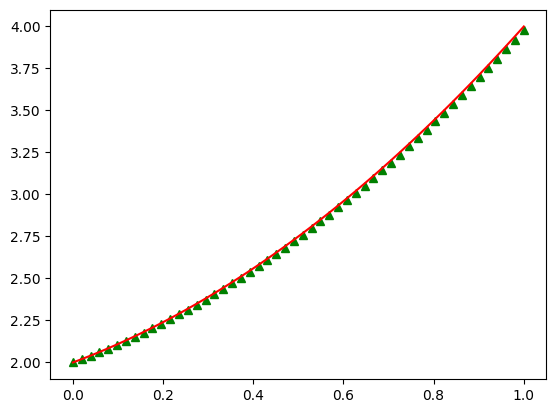

In [1392]:
plt.plot(x_vals,y_vals,"g^")
plt.plot(x_vals,y_true,color="red")

### Ejemplo: $y' = -2xy + sen(x)$ donde $y_0 = 1$ en intervalo $ x \in [0,1]$

In [1393]:
n = 100
h = 1/(n+1)
idx = np.linspace(0,n+1,n+2) # De 0 a n+1 hay n+2 valores
x_vals = idx*h
y0 = 1

$ y' +2xy = sen(x)$

$$
\frac{dy_i}{dx} \approx \frac{y_{i+1} - y_i}{h}
$$

$$
\frac{y_{i+1} - y_i}{h} + 2xy_i = \frac{y_{i+1} + (2xh -1)y_i}{h}
$$

In [1394]:
M = np.identity(n+1)

In [1395]:
for i in range(n):
    M[i+1][i] = 2*x_vals[i]*h - 1

In [1396]:
M

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.99980394,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.9807862 ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.98059014,  1.        ]], shape=(101, 101))

$$
f(x) = sen(x)
$$

In [1397]:
fx = np.sin(x_vals)

In [1398]:
b = h*fx[0:n+1]

In [1399]:
b[0] = b[0] + y0

Resolucion

In [1400]:
y = np.linalg.solve(M,b)

In [1401]:
y = np.insert(y,0,y0)

In [1402]:
y

array([1.        , 1.        , 1.00009803, 1.000098  , 0.99999988,
       0.99980372, 0.99950959, 0.9991176 , 0.99862795, 0.99804083,
       0.99735653, 0.99657536, 0.99569767, 0.99472389, 0.99365446,
       0.99248989, 0.99123072, 0.98987754, 0.98843099, 0.98689175,
       0.98526054, 0.98353813, 0.98172532, 0.97982295, 0.97783192,
       0.97575316, 0.97358762, 0.97133631, 0.96900027, 0.96658058,
       0.96407834, 0.9614947 , 0.95883083, 0.95608794, 0.95326727,
       0.95037009, 0.94739768, 0.94435139, 0.94123254, 0.93804252,
       0.93478272, 0.93145456, 0.92805949, 0.92459895, 0.92107444,
       0.91748743, 0.91383946, 0.91013203, 0.9063667 , 0.90254501,
       0.89866853, 0.89473882, 0.89075747, 0.88672608, 0.88264622,
       0.8785195 , 0.87434752, 0.87013188, 0.86587419, 0.86157606,
       0.85723907, 0.85286484, 0.84845496, 0.84401102, 0.8395346 ,
       0.83502728, 0.83049063, 0.8259262 , 0.82133555, 0.81672022,
       0.81208172, 0.80742156, 0.80274125, 0.79804226, 0.79332

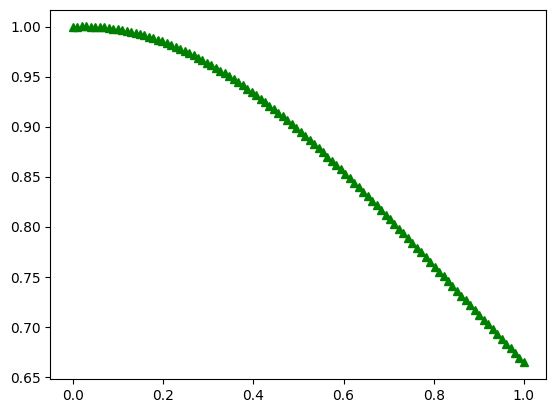

In [1403]:
plt.plot(x_vals,y,"g^")

### Ejemplo: $y' = y - x^2 + 1$ donde $y_0 = 0.5$ en intervalo $ x \in [0,2]$

In [1404]:
n = 100
h = 2/(n+1)
x_vals = np.linspace(0,2,n+2) # De 0 a n+1 hay n+2 valores
y0 = 0.5

In [1405]:
x_vals

array([0.        , 0.01980198, 0.03960396, 0.05940594, 0.07920792,
       0.0990099 , 0.11881188, 0.13861386, 0.15841584, 0.17821782,
       0.1980198 , 0.21782178, 0.23762376, 0.25742574, 0.27722772,
       0.2970297 , 0.31683168, 0.33663366, 0.35643564, 0.37623762,
       0.3960396 , 0.41584158, 0.43564356, 0.45544554, 0.47524752,
       0.4950495 , 0.51485149, 0.53465347, 0.55445545, 0.57425743,
       0.59405941, 0.61386139, 0.63366337, 0.65346535, 0.67326733,
       0.69306931, 0.71287129, 0.73267327, 0.75247525, 0.77227723,
       0.79207921, 0.81188119, 0.83168317, 0.85148515, 0.87128713,
       0.89108911, 0.91089109, 0.93069307, 0.95049505, 0.97029703,
       0.99009901, 1.00990099, 1.02970297, 1.04950495, 1.06930693,
       1.08910891, 1.10891089, 1.12871287, 1.14851485, 1.16831683,
       1.18811881, 1.20792079, 1.22772277, 1.24752475, 1.26732673,
       1.28712871, 1.30693069, 1.32673267, 1.34653465, 1.36633663,
       1.38613861, 1.40594059, 1.42574257, 1.44554455, 1.46534

$$
y' -y = 1 -x^2 \\
$$

$$
\frac{dy_i}{dx} \approx \frac{y_{i+1} - y_i}{h}
$$

$$
\frac{y_{i+1} - y_i}{h} - y_i = \frac{y_{i+1} - y_i - hy_i}{h} = \frac{y_{i+1} -(1+h)y_i}{h}
$$

In [1406]:
M = np.identity(n+1)

In [1407]:
for i in range(n):
    M[i+1][i] = -(1+h)

In [1408]:
M

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.01980198,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.01980198,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.01980198,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.01980198,  1.        ]], shape=(101, 101))

$$
f(x) = 1 -x^2
$$

In [1409]:
fx = 1 - x_vals**2

In [1410]:
b = h*fx[0:n+1]

In [1411]:
b[0] = b[0] + y0

Resolución

In [1412]:
y = np.linalg.solve(M,b)

In [1413]:
y = np.insert(y,0,y0)

In [1414]:
y

array([0.5       , 0.51980198, 0.5498893 , 0.58054912, 0.61177724,
       0.64356939, 0.6759212 , 0.70882823, 0.74228594, 0.77628971,
       0.81083482, 0.84591646, 0.88152973, 0.91766963, 0.95433104,
       0.99150878, 1.02919754, 1.0673919 , 1.10608635, 1.14527526,
       1.18495289, 1.2251134 , 1.26575081, 1.30685904, 1.34843188,
       1.390463  , 1.43294595, 1.47587414, 1.51924087, 1.56303929,
       1.60726241, 1.65190312, 1.69695416, 1.74240812, 1.78825745,
       1.83449445, 1.88111127, 1.9280999 , 1.97545217, 2.02315976,
       2.07121417, 2.11960673, 2.16832863, 2.21737084, 2.26672418,
       2.31637929, 2.36632661, 2.41655639, 2.4670587 , 2.51782341,
       2.56884019, 2.62009849, 2.67158757, 2.72329647, 2.77521401,
       2.82732879, 2.8796292 , 2.93210337, 2.98473923, 3.03752443,
       3.09044642, 3.14349236, 3.19664919, 3.24990356, 3.30324189,
       3.3566503 , 3.41011466, 3.46362054, 3.51715323, 3.57069774,
       3.62423877, 3.67776072, 3.73124768, 3.78468344, 3.83805

In [1415]:
y_true = x_vals**2 + 2*x_vals + 1 - 0.5*np.exp(x_vals)

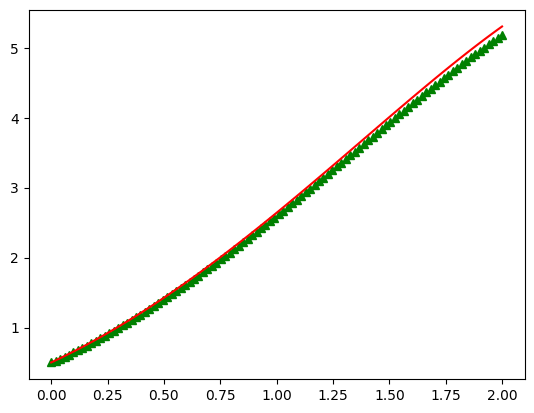

In [1416]:
plt.plot(x_vals,y,"g^")
plt.plot(x_vals,y_true,color="red")

## _EDOs de Segundo Orden_

### Ejemplo: y'' + 2y' + 6y = 0 con y(0)= 0 e y(1)= 1

In [1417]:
n = 50
min_val,max_val = 0,1
h = (max_val-min_val)/(n+1)
x_vals = np.linspace(min_val,max_val,n+2)
y0 = 0
y1 = 1

$$
\frac{d^2y_i}{dx^2} \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}
$$
$$
\frac{dy_i}{dx} \approx \frac{y_{i+1} - y_{i-1}}{2h} 
$$

$$
\frac{y_{i+1}-2y_i + y_{i-1}}{h^2} + 2\frac{y_{i+1} - y_{i-1}}{2h} + 6y_i = y_{i+1}-2y_i + y_{i-1} + (y_{i+1} - y_{i-1})h + 6h^2y_i
$$

$$
(1-h)y_{i-1} + (6h^2 -2)y_i + (1+h)y_{i+1}
$$

In [1418]:
M = np.identity(n+1)

In [1419]:
for i in range(n+1): #Termino y_i
    M[i][i] = 6*h**2 -2

for i in range(n): #Termino y_i+1
    M[i][i+1] = 1 + h

for i in range(n): #Termino y_i-1
    M[i+1][i] = 1 - h

In [1420]:
M

array([[-1.99769319,  1.01960784,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.98039216, -1.99769319,  1.01960784, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.98039216, -1.99769319, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.99769319,
         1.01960784,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.98039216,
        -1.99769319,  1.01960784],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.98039216, -1.99769319]], shape=(51, 51))

f(x) = 0 pero hay que tener en cuenta que y(1) = 1

In [1421]:
b = np.zeros(n+1)
b[0] = -(1-h)*y0
b[n] = -(1+h)*y1

Resolución

In [1422]:
y = np.linalg.solve(M,b)
y = np.insert(y,0,y0)

In [1423]:
y

array([0.        , 0.15708462, 0.30777212, 0.45196764, 0.58959462,
       0.72059433, 0.84492529, 0.96256269, 1.07349783, 1.17773751,
       1.27530341, 1.36623147, 1.45057127, 1.5283854 , 1.5997488 ,
       1.6647481 , 1.72348104, 1.77605574, 1.8225901 , 1.86321118,
       1.8980545 , 1.92726345, 1.95098866, 1.96938735, 1.98262278,
       1.99086358, 1.99428321, 1.99305936, 1.9873734 , 1.97740981,
       1.96335565, 1.94540006, 1.92373371, 1.89854835, 1.87003629,
       1.83839   , 1.80380163, 1.76646257, 1.72656311, 1.68429199,
       1.63983608, 1.59337996, 1.54510569, 1.49519241, 1.44381608,
       1.39114921, 1.3373606 , 1.28261507, 1.2270733 , 1.17089156,
       1.11422159, 1.05721036])

In [1424]:
cnst=np.e/np.sin(np.sqrt(5))
y_true=cnst*(np.sin(np.sqrt(5)*x_vals))*np.exp(-x_vals)

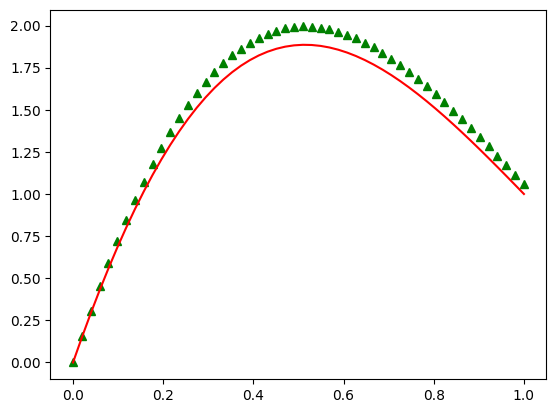

In [1425]:
plt.plot(x_vals,y,"g^")
plt.plot(x_vals,y_true,color="red")

### Ejemplo $y'' - y' = 0$ con $y(0) = 1$ y $y(1)=0$

In [1426]:
n = 50
h = 1/(n+1)
x_vals = np.linspace(0,1,n+2)
y0 = 1
y1 = 0

In [1427]:
M = np.identity(n+1)

In [1428]:
for i in range(n+1):
    M[i][i] = -2 - h**2

for i in range(n):
    M[i][i+1] = 1

for i in range(n):
    M[i+1][i] = 1

In [1429]:
M

array([[-2.00038447,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -2.00038447,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        , -2.00038447, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -2.00038447,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -2.00038447,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -2.00038447]], shape=(51, 51))

In [1430]:
x_vals

array([0.        , 0.01960784, 0.03921569, 0.05882353, 0.07843137,
       0.09803922, 0.11764706, 0.1372549 , 0.15686275, 0.17647059,
       0.19607843, 0.21568627, 0.23529412, 0.25490196, 0.2745098 ,
       0.29411765, 0.31372549, 0.33333333, 0.35294118, 0.37254902,
       0.39215686, 0.41176471, 0.43137255, 0.45098039, 0.47058824,
       0.49019608, 0.50980392, 0.52941176, 0.54901961, 0.56862745,
       0.58823529, 0.60784314, 0.62745098, 0.64705882, 0.66666667,
       0.68627451, 0.70588235, 0.7254902 , 0.74509804, 0.76470588,
       0.78431373, 0.80392157, 0.82352941, 0.84313725, 0.8627451 ,
       0.88235294, 0.90196078, 0.92156863, 0.94117647, 0.96078431,
       0.98039216, 1.        ])

In [1431]:
fx = np.zeros(n+1)
fx[0] = -y0
fx[-1] = -y1


In [1432]:
fx

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [1433]:
y= np.linalg.solve(M,fx)

In [ ]:
y = np.insert(y,0,y0)

In [1435]:
y

array([1.        , 0.97471636, 0.94980746, 0.92526373, 0.90107574,
       0.87723418, 0.85372989, 0.83055383, 0.80769709, 0.78515089,
       0.76290655, 0.74095552, 0.71928937, 0.69789976, 0.67677847,
       0.65591738, 0.63530846, 0.61494381, 0.59481558, 0.57491603,
       0.55523753, 0.53577249, 0.51651344, 0.49745297, 0.47858376,
       0.45989855, 0.44139015, 0.42305146, 0.40487541, 0.38685503,
       0.36898337, 0.35125359, 0.33365884, 0.31619238, 0.29884748,
       0.28161748, 0.26449575, 0.24747572, 0.23055082, 0.21371457,
       0.19696049, 0.18028213, 0.16367308, 0.14712696, 0.1306374 ,
       0.11419807, 0.09780265, 0.08144483, 0.06511832, 0.04881684,
       0.03253414, 0.01626394])

In [ ]:
e = np.e
A = -1/(e**2 - 1)
B = 1 - A
y_true = A*np.exp(x_vals) + B*np.exp(x_vals)

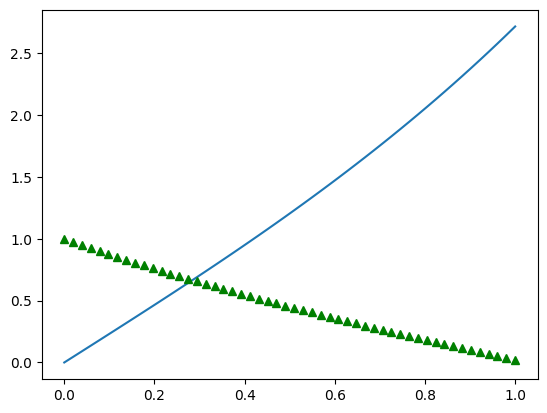

In [1437]:
plt.plot(x_vals,y_true)
plt.plot(x_vals,y,"g^")